In [1]:
# Testing fsolve with a single temperature

import numpy as np
import scipy.optimize as opt

AC_LK = np.array([4.02232,1206.53,220.291])
AC_HK = np.array([4.0854,1348.77,219.976])

x = np.linspace(0,1, num = 11) 

def P_Ant(T):
    
    xA = 0.1 # Mol Frac
    P_Tot = 1 # Bara

    P_Ant_LK = pow(10,AC_LK[0]-(AC_LK[1]/(T+AC_LK[2])))
    P_Ant_HK = pow(10,AC_HK[0]-(AC_HK[1]/(T+AC_HK[2])))

    PA = P_Ant_LK*xA
    PB = P_Ant_HK*(1-xA)

    F = np.empty((1))
    F[0] = P_Tot - (PA + PB)

    return F

T = opt.fsolve(P_Ant,1)

print(T)

[ 105.68098558]


In [1]:
# Testing fsolve with multiple temperatures

import numpy as np
import scipy.optimize as opt

AC_LK = np.array([4.02232,1206.53,220.291])
AC_HK = np.array([4.0854,1348.77,219.976])

#xA = np.linspace(0,1, num = 11) 
xA = np.array([0.1,0.2])

F = np.empty((2))

def P_Ant(T):
    
    P_Tot = 1 # Bara

    T1 = T[0]
    T2 = T[1]

    
    
    PA = pow(10,AC_LK[0]-(AC_LK[1]/(T1+AC_LK[2])))*xA[0]
    PB = pow(10,AC_HK[0]-(AC_HK[1]/(T1+AC_HK[2])))*(1-xA[0])
    F[0] = P_Tot - (PA + PB)
    
    PA = pow(10,AC_LK[0]-(AC_LK[1]/(T2+AC_LK[2])))*xA[1]
    PB = pow(10,AC_HK[0]-(AC_HK[1]/(T2+AC_HK[2])))*(1-xA[1])
    F[1] = P_Tot - (PA + PB)

    return F
TGuess = [100,100]
T = opt.fsolve(P_Ant,TGuess)

print(T)

[ 105.68098558  101.64989469]


In [1]:
# This was a test to use variables in arrays

import numpy as np
import scipy.optimize as opt

N_Size = 11

N = np.linspace(0,N_Size-1,N_Size)
xA = np.linspace(0,1,N_Size)

x = np.array([N[0:N_Size],xA[0:N_Size]])

print(x[1,2])

0.2


[[  0.00000000e+00   1.00000000e-01   2.00000000e-01   3.00000000e-01
    4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
    8.00000000e-01   9.00000000e-01   1.00000000e+00]
 [  0.00000000e+00   2.09406260e-01   3.76421574e-01   5.11521771e-01
    6.22213403e-01   7.13961500e-01   7.90806308e-01   8.55778594e-01
    9.11183242e-01   9.58795700e-01   1.00000000e+00]
 [  1.10167927e+02   1.05680986e+02   1.01649895e+02   9.80061769e+01
    9.46936497e+01   9.16660935e+01   8.88853151e+01   8.63195818e+01
    8.39423711e+01   8.17313783e+01   7.96677303e+01]] [ -2.04557240e-01   9.39001905e-01  -1.98777848e+00   2.70866554e+00
  -2.80453569e+00   2.34919972e+00   2.21692002e-06]


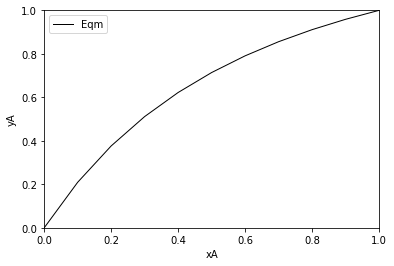

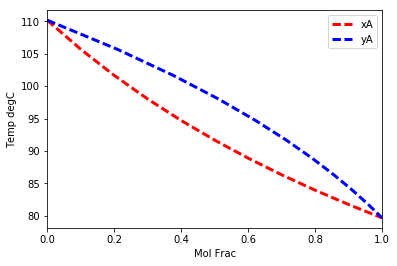

In [2]:
# This will create your Eqm curve and produce a Txy diagram as well

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

AC_LK = np.array([4.02232,1206.53,220.291])
AC_HK = np.array([4.0854,1348.77,219.976])

P_Tot = 1 # Bara
N_Size = 11 # 1001 = 0.1% accuracy for xA

xA = np.linspace(0,1,N_Size)
yA = np.linspace(0.00,0.00,N_Size)
T = np.linspace(0.00,0.00,N_Size)

x = np.array([xA[0:N_Size],yA[0:N_Size],T[0:N_Size]]) # x[xA,yA,T]

F = np.empty((1))

def xA_T(N):
    xA_Ant = x[0,N]
    def P_Ant(T):

        PA = pow(10,AC_LK[0]-(AC_LK[1]/(T+AC_LK[2])))*xA_Ant
        PB = pow(10,AC_HK[0]-(AC_HK[1]/(T+AC_HK[2])))*(1-xA_Ant)
                                                       
        F[0] = P_Tot - (PA + PB)

        return F
    
    TGuess = [100]
    T = opt.fsolve(P_Ant,TGuess)

    x[2,N] = T
    
    return x

for N in range(0,len(xA)):
    xA_T(N)
    x[1,N] = pow(10,AC_LK[0]-(AC_LK[1]/(x[2,N]+AC_LK[2])))*x[0,N]/P_Tot
    

Eqm_Poly = np.polyfit(x[0,0:N_Size], x[1,0:N_Size], 6)

  
print(x,Eqm_Poly)

plt.plot(x[0,0:N_Size],x[1,0:N_Size],'k-',linewidth=1)
plt.legend(['Eqm'])
plt.xlabel('xA')
plt.ylabel('yA')
plt.xlim([0.00, 1])
plt.ylim([0.00, 1])
plt.savefig('x.png')
plt.savefig('x.eps')
plt.show()

plt.plot(x[0,0:N_Size],x[2,0:N_Size],'r--',linewidth=3)
plt.plot(x[1,0:N_Size],x[2,0:N_Size],'b--',linewidth=3)
plt.legend(['xA','yA'])
plt.xlabel('Mol Frac')
plt.ylabel('Temp degC')
plt.xlim([0, 1])
plt.savefig('Txy.png')
plt.savefig('Txy.eps')
plt.show()

x =  [[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   9.98000000e-01
    9.99000000e-01   1.00000000e+00]
 [  0.00000000e+00   2.34813127e-03   4.69060855e-03 ...,   9.99231251e-01
    9.99615891e-01   1.00000000e+00]
 [  1.10167927e+02   1.10120541e+02   1.10073209e+02 ...,   7.97076673e+01
    7.96876922e+01   7.96677303e+01]]
Eqm_Poly =  [ -2.03996454e-01   9.34113155e-01  -1.97770021e+00   2.69995050e+00
  -2.80100057e+00   2.34856317e+00   4.03253371e-05]
x_q =  [ 0.64733254]
y_q =  [ 0.82289075]
q_int =  2.333333333333333
yxten =  0.209397954431


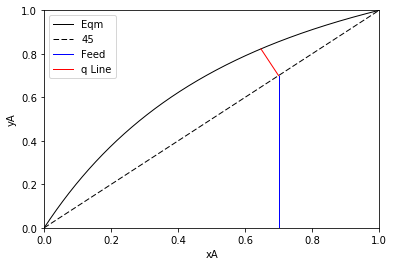

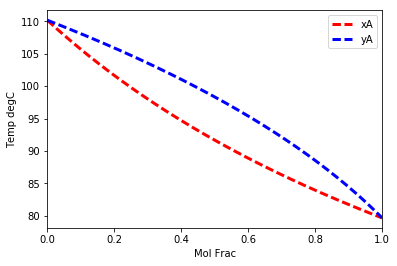

In [2]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

#--------------------------------------------------------------------------------------------------------------------------------
# Variables to set

AC_LK = np.array([4.02232,1206.53,220.291])
AC_HK = np.array([4.0854,1348.77,219.976])

P_Tot = 1 # Bara
N_Size = 1001 # 1001 = 0.1% accuracy for xA

xf = 0.7
q = 0.7

#--------------------------------------------------------------------------------------------------------------------------------
# making x array which contains xA, yA and T from xA = 0 -> 1 @ step = 1/(N_Size-1)

xA = np.linspace(0,1,N_Size)
yA = np.linspace(0.00,0.00,N_Size)
T = np.linspace(0.00,0.00,N_Size)

x = np.array([xA[0:N_Size],yA[0:N_Size],T[0:N_Size]]) # x[xA,yA,T]

#--------------------------------------------------------------------------------------------------------------------------------
# Fitting T values to xA for Eqm line

def xA_T(N):
    xA_Ant = x[0,N]
    def P_Ant(T):

        PA = pow(10,AC_LK[0]-(AC_LK[1]/(T+AC_LK[2])))*xA_Ant
        PB = pow(10,AC_HK[0]-(AC_HK[1]/(T+AC_HK[2])))*(1-xA_Ant)

        F = np.empty((1))
        F[0] = P_Tot - (PA + PB)
        return F[0]
    
    TGuess = [100]
    T = opt.fsolve(P_Ant,TGuess)

    x[2,N] = T
    
    return x

for N in range(0,len(xA)):
    xA_T(N)
    x[1,N] = pow(10,AC_LK[0]-(AC_LK[1]/(x[2,N]+AC_LK[2])))*x[0,N]/P_Tot

#--------------------------------------------------------------------------------------------------------------------------------
# xA to yA polynomial function

Eqm_Poly = np.polyfit(x[0,0:N_Size], x[1,0:N_Size], 6)

def Eqm_x2y(xA_poly):
    
    yA_poly = Eqm_Poly[0]*pow(xA_poly,6)+Eqm_Poly[1]*pow(xA_poly,5)+Eqm_Poly[2]*pow(xA_poly,4)+Eqm_Poly[3]*pow(xA_poly,3)+Eqm_Poly[4]*pow(xA_poly,2)+Eqm_Poly[5]*pow(xA_poly,1)+Eqm_Poly[6]*pow(xA_poly,0)
    
    return yA_poly
    
#--------------------------------------------------------------------------------------------------------------------------------
# fitting q line to eqm

if q != 1:
    q_int = ((-q*0)/(1-q)) + (xf/(1-q))
else:
    q_int = Eqm_x2y(xf)

q_Poly = np.polyfit([xf,0], [xf,q_int], 1)
    
def qline_Eqm(x_q):
    
    if q != 1:
        y_q = q_Poly[0]*x_q + q_Poly[1]
    else:
        y_q = Eqm_x2y(xf)
    
    eqm_y = Eqm_x2y(x_q)
    
    F = np.empty((1))
    F[0] = y_q - eqm_y 
    
    return F

x_qGuess = [0.5]
x_q = opt.fsolve(qline_Eqm,x_qGuess)

q_eqm = Eqm_x2y(x_q)

#--------------------------------------------------------------------------------------------------------------------------------
# Test values to print

xten = 0.1 # <-- This section works so the Eqm_Poly is working
yxten = Eqm_x2y(xten)   
    
#--------------------------------------------------------------------------------------------------------------------------------
# Outputs

print('x = ',x)
print('Eqm_Poly = ',Eqm_Poly)
print('x_q = ',x_q)
print('y_q = ',Eqm_x2y(x_q))
print('q_int = ',q_int)
print('yxten = ',yxten)

plt.plot(x[0,0:N_Size],x[1,0:N_Size],'k-',linewidth=1, label='Eqm')
plt.plot([0,1],[0,1],'k--',linewidth=1, label='45')
plt.plot([xf,xf],[0,xf],'b-',linewidth=1, label='Feed')
plt.plot([xf,x_q],[xf,q_eqm],'r-',linewidth=1, label='q Line')
plt.legend()
plt.xlabel('xA')
plt.ylabel('yA')
plt.xlim([0.00, 1])
plt.ylim([0.00, 1])
plt.savefig('x.png')
plt.savefig('x.eps')
plt.show()

plt.plot(x[0,0:N_Size],x[2,0:N_Size],'r--',linewidth=3)
plt.plot(x[1,0:N_Size],x[2,0:N_Size],'b--',linewidth=3)
plt.legend(['xA','yA'])
plt.xlabel('Mol Frac')
plt.ylabel('Temp degC')
plt.xlim([0, 1])
plt.savefig('Txy.png')
plt.savefig('Txy.eps')
plt.show()

x =  [[  0.00000000e+00   1.00000000e-01   2.00000000e-01   3.00000000e-01
    4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
    8.00000000e-01   9.00000000e-01   1.00000000e+00]
 [  0.00000000e+00   2.09406260e-01   3.76421574e-01   5.11521771e-01
    6.22213403e-01   7.13961500e-01   7.90806308e-01   8.55778594e-01
    9.11183242e-01   9.58795700e-01   1.00000000e+00]
 [  1.10167927e+02   1.05680986e+02   1.01649895e+02   9.80061769e+01
    9.46936497e+01   9.16660935e+01   8.88853151e+01   8.63195818e+01
    8.39423711e+01   8.17313783e+01   7.96677303e+01]]
Eqm_Poly_x2y =  [ -2.04557240e-01   9.39001905e-01  -1.98777848e+00   2.70866554e+00
  -2.80453569e+00   2.34919972e+00   2.21692002e-06]
x_q =  [ 0.64733208]
y_q =  [ 0.82289181]
x_q_TOL =  [ 0.65264614]
yxten =  0.209395905079
xyten =  0.0999803828277
Plates =  61
R =  1.07387849637
Plates =  [[ 0.98        0.94979524  0.94979524  0.91282626  0.91282626  0.87004166
   0.87004166  0.82362342  0.82362342  0.7

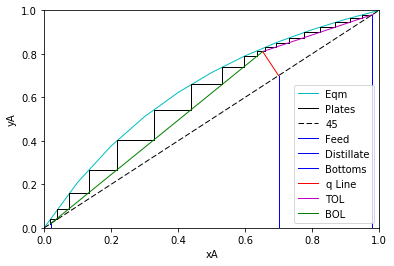

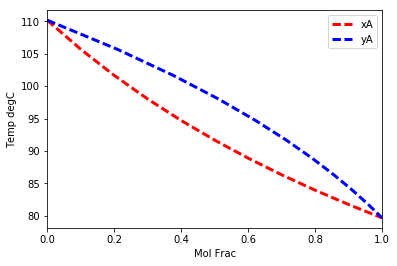

In [16]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

import Inputs as input

#--------------------------------------------------------------------------------------------------------------------------------
# Variables to set (Values are taken from the Inputs file)

AC_LK = input.Var_In('AC_LK')
AC_HK = input.Var_In('AC_HK')

P_Tot = input.Var_In('P_Tot') # Bara
N_Size = input.Var_In('N_Size') # 1001 = 0.1% accuracy for xA

xf = input.Var_In('xf')
xd = input.Var_In('xd')
xb = input.Var_In('xb')

q = input.Var_In('q')
Rf = input.Var_In('Rf')
Max_Pl = input.Var_In('Max_Pl')

#--------------------------------------------------------------------------------------------------------------------------------
# making x array which contains xA, yA and T from xA = 0 -> 1 @ step = 1/(N_Size-1)

xA = np.linspace(0,1,N_Size)
yA = np.linspace(0.00,0.00,N_Size)
T = np.linspace(0.00,0.00,N_Size)

x = np.array([xA[0:N_Size],yA[0:N_Size],T[0:N_Size]]) # x[xA,yA,T]

#--------------------------------------------------------------------------------------------------------------------------------
# Fitting T values to xA for Eqm line

def xA_T(N):
    xA_Ant = x[0,N]
    def P_Ant(T):

        PA = pow(10,AC_LK[0]-(AC_LK[1]/(T+AC_LK[2])))*xA_Ant
        PB = pow(10,AC_HK[0]-(AC_HK[1]/(T+AC_HK[2])))*(1-xA_Ant)

        F = np.empty((1))
        F[0] = P_Tot - (PA + PB)
        return F[0]
    
    TGuess = [100]
    T = opt.fsolve(P_Ant,TGuess)

    x[2,N] = T
    
    return x

for N in range(0,len(xA)):
    xA_T(N)
    x[1,N] = pow(10,AC_LK[0]-(AC_LK[1]/(x[2,N]+AC_LK[2])))*x[0,N]/P_Tot

#--------------------------------------------------------------------------------------------------------------------------------
# xA to yA polynomial function

Eqm_Poly_x2y = np.polyfit(x[0,0:N_Size], x[1,0:N_Size], 6)
Eqm_Poly_y2x = np.polyfit(x[1,0:N_Size], x[0,0:N_Size], 6)

def Eqm_x2y(xA_poly):
    
    yA_poly = Eqm_Poly_x2y[0]*pow(xA_poly,6)+Eqm_Poly_x2y[1]*pow(xA_poly,5)+Eqm_Poly_x2y[2]*pow(xA_poly,4)+Eqm_Poly_x2y[3]*pow(xA_poly,3)+Eqm_Poly_x2y[4]*pow(xA_poly,2)+Eqm_Poly_x2y[5]*pow(xA_poly,1)+Eqm_Poly_x2y[6]*pow(xA_poly,0)
    
    return yA_poly

def Eqm_y2x(yA_poly):
    
    xA_poly = Eqm_Poly_y2x[0]*pow(yA_poly,6)+Eqm_Poly_y2x[1]*pow(yA_poly,5)+Eqm_Poly_y2x[2]*pow(yA_poly,4)+Eqm_Poly_y2x[3]*pow(yA_poly,3)+Eqm_Poly_y2x[4]*pow(yA_poly,2)+Eqm_Poly_y2x[5]*pow(yA_poly,1)+Eqm_Poly_y2x[6]*pow(yA_poly,0)
    
    return xA_poly

#--------------------------------------------------------------------------------------------------------------------------------
# fitting q line to eqm

if q != 1:
    q_int = ((-q*0)/(1-q)) + (xf/(1-q))
else:
    q_int = Eqm_x2y(xf)

q_Poly = np.polyfit([xf,0], [xf,q_int], 1)
    
def qline_Eqm(x_q):
    
    if q != 1:
        y_q = q_Poly[0]*x_q + q_Poly[1]
    else:
        y_q = Eqm_x2y(xf)
    
    eqm_y = Eqm_x2y(x_q)
    
    F = np.empty((1))
    F[0] = y_q - eqm_y 
    
    return F

x_qGuess = [0.5]
x_q = opt.fsolve(qline_Eqm,x_qGuess)

q_eqm = Eqm_x2y(x_q)

#--------------------------------------------------------------------------------------------------------------------------------
# Finding the TOL

TOL_Rmin_Poly = np.polyfit([xd,x_q], [xd,Eqm_x2y(x_q)], 1)

Rmin = 0.00
Rmin = TOL_Rmin_Poly[0]/(1-TOL_Rmin_Poly[0])
R = Rmin*Rf

def qline_TOL(x_q_TOL):
    
    if q != 1:
        y_q = q_Poly[0]*x_q_TOL + q_Poly[1]
    else:
        y_q = (R*xf)/(R+1) + xd/(R+1)
    
    y_TOL = (R*x_q_TOL)/(R+1) + xd/(R+1)
    
    F = np.empty((1))
    F[0] = y_q - y_TOL 
    
    return F

x_q_TOLGuess = [0.5]
x_q_TOL = opt.fsolve(qline_TOL,x_q_TOLGuess)


#--------------------------------------------------------------------------------------------------------------------------------
# fitting TOL & BOL to polynomials

TOL_Poly = np.polyfit([xd,x_q_TOL], [xd,(R*x_q_TOL)/(R+1) + xd/(R+1)], 1)
BOL_Poly = np.polyfit([xb,x_q_TOL], [xb,(R*x_q_TOL)/(R+1) + xd/(R+1)], 1)

def TOL_x2y(xA_poly):
    
    yA_poly = TOL_Poly[0]*xA_poly+TOL_Poly[1]
    
    return yA_poly

def BOL_x2y(xA_poly):
    
    yA_poly = BOL_Poly[0]*xA_poly+BOL_Poly[1]
    
    return yA_poly

#--------------------------------------------------------------------------------------------------------------------------------
# Making plates array

xp = np.linspace(0.00,0.00,2*Max_Pl+1)

All_Pl = np.array([xp[0:2*Max_Pl+1],xp[0:2*Max_Pl+1]]) # x[xp,yp], All plates is all the data points from the plate calculations

All_Pl[0,0] = xd
All_Pl[1,0] = xd

#--------------------------------------------------------------------------------------------------------------------------------
# Setting plates array

def xy_All_Pl(N):
    
    if N % 2 == 0:  
        All_Pl[0,N] = All_Pl[0,N-1]
        if All_Pl[0,N-1] > x_q_TOL:
            All_Pl[1,N] = TOL_x2y(All_Pl[0,N-1])
        else:
            All_Pl[1,N] = BOL_x2y(All_Pl[0,N-1])
    
    else:
        All_Pl[0,N] = Eqm_y2x(All_Pl[1,N-1])
        All_Pl[1,N] = All_Pl[1,N-1]
    
    return All_Pl

for N in range(1,len(xp)):
    xy_All_Pl(N)

#--------------------------------------------------------------------------------------------------------------------------------
# 

idx = 2 + (np.abs(All_Pl[0,:] - xb)).argmin() # don't forget that this choses the closest but it needs to be checked that its less than xb

if All_Pl[0,idx] <= xb:
    xba = All_Pl[0,idx]
else:
    xba = 2 + All_Pl[0,idx]
    idx = 2 + idx

xpl = np.linspace(0.00,0.00,idx)

Plates = np.array([xpl[0:idx],xpl[0:idx]]) # x[xp,yp], All plates is all the data points from the plate calculations

def Act_Pl(N):
    Plates[0,N] = All_Pl[0,N]
    Plates[1,N] = All_Pl[1,N]

for N in range (0,idx):
    Act_Pl(N) # Actual plates

Num_Plates = int((idx-1)/2)
    
    
#--------------------------------------------------------------------------------------------------------------------------------
# Alternative way to set the plates but was found to be slower
    
#def xy_Plates(N):
    
    #i = 2*N - 1
    
    #while Plates[0,i-1] > x_q_TOL:
    
        #if i % 2 == 0:  
            #Plates[0,i] = Plates[0,i-1]
            #Plates[1,i] = TOL_x2y(Plates[0,i-1])

        #else:
            #Plates[0,i] = Eqm_y2x(Plates[1,i-1])
            #Plates[1,i] = Plates[1,i-1]
            
        #i = i + 1
    #while Plates[0,i-1] <= x_q_TOL and i < 61: 
        #if i % 2 == 0:  
            #Plates[0,i] = Plates[0,i-1]
            #Plates[1,i] = BOL_x2y(Plates[0,i-1])

        #else:
            #Plates[0,i] = Eqm_y2x(Plates[1,i-1])
            #Plates[1,i] = Plates[1,i-1]
            
        #i = i + 1
    
    #return Plates
    

#Ntop = Max_Pl
    
#for N in range(1,Ntop):
    #xy_Plates(N)


#--------------------------------------------------------------------------------------------------------------------------------
# Test values to print

xten = 0.1 # <-- This section works so the Eqm_Poly is working
yxten = Eqm_x2y(xten)   
xyten = Eqm_y2x(yxten)
    
#--------------------------------------------------------------------------------------------------------------------------------
# Outputs

print('x = ',x)
print('Eqm_Poly_x2y = ',Eqm_Poly_x2y)
print('x_q = ',x_q)
print('y_q = ',Eqm_x2y(x_q))
print('x_q_TOL = ',x_q_TOL)
print('yxten = ',yxten)
print('xyten = ',xyten)
print('Plates = ',2*Max_Pl+1)
print('R = ',R)
print('Plates = ',Plates)
print('idx = ',idx)
print('Num_Plates = ',Num_Plates)

plt.plot(x[0,0:N_Size],x[1,0:N_Size],'c-',linewidth=1, label='Eqm')
plt.plot(Plates[0,0:2*Max_Pl+1],Plates[1,0:2*Max_Pl+1],'k-',linewidth=1, label='Plates')
plt.plot([0,1],[0,1],'k--',linewidth=1, label='45')
plt.plot([xf,xf],[0,xf],'b-',linewidth=1, label='Feed')
plt.plot([xd,xd],[0,xd],'b-',linewidth=1, label='Distillate')
plt.plot([xb,xb],[0,xb],'b-',linewidth=1, label='Bottoms')
plt.plot([xf,x_q_TOL],[xf,(R*x_q_TOL)/(R+1) + xd/(R+1)],'r-',linewidth=1, label='q Line')
plt.plot([xd,x_q_TOL],[xd,(R*x_q_TOL)/(R+1) + xd/(R+1)],'m-',linewidth=1, label='TOL')
plt.plot([xb,x_q_TOL],[xb,(R*x_q_TOL)/(R+1) + xd/(R+1)],'g-',linewidth=1, label='BOL')
plt.legend()
plt.xlabel('xA')
plt.ylabel('yA')
plt.xlim([0.00, 1])
plt.ylim([0.00, 1])
plt.savefig('x.png')
plt.savefig('x.eps')
plt.show()

plt.plot(x[0,0:N_Size],x[2,0:N_Size],'r--',linewidth=3)
plt.plot(x[1,0:N_Size],x[2,0:N_Size],'b--',linewidth=3)
plt.legend(['xA','yA'])
plt.xlabel('Mol Frac')
plt.ylabel('Temp degC')
plt.xlim([0, 1])
plt.savefig('Txy.png')
plt.savefig('Txy.eps')
plt.show()